画出对比试验柱状图（Figure 8）

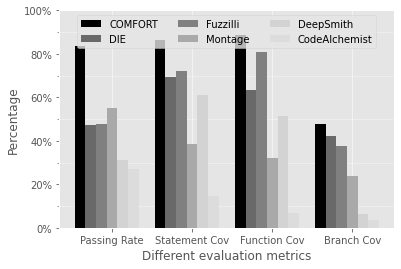

In [46]:
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import json


def to_percent(temp, position):
    return '%1.0f'%(temp) + '%'
    
def drawBars(coverages, fuzzer_names):
    arguments = ["Passing Rate", "Statement Cov", "Function Cov", "Branch Cov"]
    fc = ['k', 'dimgray', 'grey', 'darkgray', 'lightgray', 'gainsboro']
    x = list(range(len(arguments)))
    total_width, n = 0.8, 6
    width = total_width / n

    # 设置主次刻度间隔
    ymajorLocator = MultipleLocator(20)
    yminorLocator = MultipleLocator(10)

    # 设置y轴刻度值
    plt.yticks([0, 20, 40, 60, 80, 100])
    plt.ylim(0, 100)
    # 设置主次刻度线
    plt.grid(which="major", axis="y", linestyle="-")
    plt.grid(which="minor", axis="y", linestyle="--")
    # 显示主次刻度
    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    plt.gca().yaxis.set_major_locator(ymajorLocator)
    plt.gca().yaxis.set_minor_locator(yminorLocator)

    plt.xlabel("Different evaluation metrics")
    plt.ylabel("Percentage")
    # 显示柱状图
    for i in range(len(coverages)):
        if i == len(coverages) - 3:
            # zorder越大，表示柱子越靠后，不会被虚线覆盖
            plt.bar(x, coverages[i], width=width, label=fuzzer_names[i], tick_label=arguments, fc=fc[i], zorder=2)
        else:
            plt.bar(x, coverages[i], width=width, label=fuzzer_names[i], fc=fc[i], zorder=2)
        for j in range(len(x)):
            x[j] = x[j] + width
    plt.legend(loc='upper center', fontsize=10, ncol=3)
    plt.style.use('ggplot')
    plt.show()
    

def extractMetrics(fuzzer):
    # 使用jshint测试得到的通过率
    parent_dir = "/mnt/aliyun/qx/codeCoverage/result/"+fuzzer.lower()+"/"+fuzzer.lower()+"_report/"
    coverage_path = os.path.join(parent_dir, "coverage-summary.json")
    
    passing_rates = {"COMFORT": 83.498, "DIE": 47.137, "Fuzzilli": 47.521, "Montage": 55.321, "DeepSmith": 31.234, "CodeAlchemist": 27.014}
    with open(coverage_path, "r", encoding="utf-8") as f:
        content = f.read()
    coverage_message = json.loads(content)
    passing_rate = passing_rates[fuzzer]
    statement_cov = coverage_message['total']["statements"]['pct']
    function_cov = coverage_message['total']["functions"]['pct']
    branch_cov = coverage_message['total']["branches"]['pct']
    return [passing_rate, statement_cov, function_cov, branch_cov]